In [35]:
# General
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ML

from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from xgboost import XGBClassifier


# feature extraction
import biosppy.signals.ecg as ecg

# Custom
import sys,os
sys.path.append( '.' )
sys.path.append( '..' )
import Components.Outlier_Detection as Outlier_Detection
import Components.Feature_Selection as Feature_Selection
import Components.Normalisation as Normalisation
import Components.data_fetching as data_fetching
import Components.feature_extraction as feature_extraction
import Components.Two_Step_Model as Two_Step_Model

# CAREFUL:
# If you make changes to a custom module, you have to reload it, i.e rerun this cell
import importlib
importlib.reload(Outlier_Detection)
importlib.reload(Feature_Selection)
importlib.reload(Normalisation)
importlib.reload(data_fetching)
importlib.reload(feature_extraction)
importlib.reload(Two_Step_Model)



from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets



### Data Input

In [3]:
X, y = data_fetching.get_train_data()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3337: DtypeWarning: Columns (17979) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [47]:
X_luke, y_luke = data_fetching.get_engineered_train_data()
print(type(X_luke))
print(np.shape(y_luke))
X_luke = X_luke.drop(0, 1)
print(X_luke)

<class 'pandas.core.frame.DataFrame'>
(5117, 1)
             1           2             3           4             5    \
0      68.630849  320.555556  30973.802469  287.600000   7399.240000   
1      61.726883  328.750000   9966.687500  303.307692   3872.366864   
2      84.916201  229.314286   4131.929796  229.400000   3534.982857   
3      67.432567  287.037037  11692.702332  287.037037  11852.480110   
4      59.495192  553.666667  73455.555556  411.500000  49303.000000   
...          ...         ...           ...         ...           ...   
5112   70.249174  312.555556  11353.358025  279.083333   8635.909722   
5113  100.600962  178.967742    125.364551  178.924731     87.037345   
5114   83.731456  216.027027    224.945215  214.972973     51.647918   
5115   72.080089  275.346939   5942.063307  275.081633   5983.830071   
5116   80.042689  225.000000    261.440000  225.280000     88.921600   

             6            7           8             9           10   ...  \
0     262.2

In [55]:
X = pd.concat([X_transf, X_luke], axis=1)
print(np.shape(X))

(5117, 504)


### Feature Extraction

In [4]:
X_transf = feature_extraction.get_features(X=X,types=['heartbeats', 'timeseries'], verbose=True, precomputed='train')

In [7]:
print(np.shape(y))

(5117, 1)


[[<AxesSubplot:title={'center':'y'}>]]


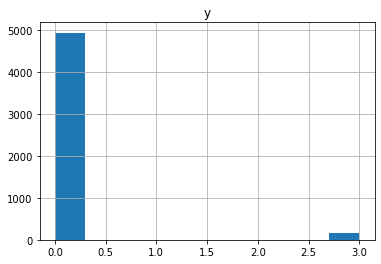

In [233]:
# check pca: 
y_1 = y.copy()
y_1['y'] = np.where((y_1.y == 1), 0, y_1.y)
y_1['y'] = np.where((y_1.y == 2), 0, y_1.y)
print(y_1.hist())

In [238]:
pipe = Pipeline([('scaling',StandardScaler()),
                 ('classification',
                  SVC(C=5.0, gamma=0.0001, class_weight={0:1, 3:100}))
                ])

In [240]:
scores = cross_val_score(pipe, X_transf, y_1[0:5116], cv=10, scoring='f1_micro')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/con

[0.80078125 0.80664062 0.78710938 0.82226562 0.82226562 0.80273438
 0.81604697 0.81213307 0.79060665 0.80626223]
Accuracy: 0.81 (+/- 0.02)


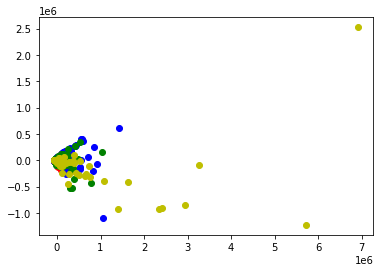

In [80]:
pca = PCA(n_components=2)
pca.fit(X_transf)
X_pca = pca.transform(X_transf)
X_pca = pd.DataFrame(X_pca)
idx_1 = np.where(y[:1500].y == 1)
idx_0 = np.where(y[:1500].y == 0)
idx_2 = np.where(y[:1500].y == 2)
idx_3 = np.where(y[:1500].y == 3)

class_0 = pd.DataFrame(X_pca.iloc[idx_0])
class_1 = pd.DataFrame(X_pca.iloc[idx_1])
class_2 = pd.DataFrame(X_pca.iloc[idx_2])
class_3 = pd.DataFrame(X_pca.iloc[idx_3])



#print(class_1[0])


plt.scatter(class_1[0], class_1[1], c='r')
plt.scatter(class_0[0], class_0[1], c='b')
plt.scatter(class_2[0], class_2[1], c='g')
plt.scatter(class_3[0], class_3[1], c='y')



plt.show()

[[<AxesSubplot:title={'center':'y'}>]]


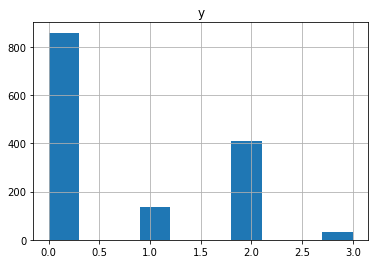

### Pipeline for Outlier Detection of Class 2

In [48]:
clf1 = SVC(shrinking=True, cache_size=1000)
clf2 = SVC(shrinking=True, cache_size=1000)
clf1_args = {'C':1.0, 'kernel': 'rbf', 'gamma': 'auto', 'shrinking':True, 'cache_size':1000, 'class_weight': 'balanced'}
clf2_args = {'C':1.0, 'kernel': 'rbf', 'gamma': 'auto', 'shrinking':True, 'cache_size':1000, 'class_weight': 'balanced'}

In [49]:
pipe = Pipeline([('scaling',StandardScaler()),
                 ('classification',
                  Two_Step_Model.TwoStepModel(clf1, clf2))
                ])

In [209]:
# fit the pipeline and evaluate

scores = cross_val_score(pipe, X_transf, y[0:5116], cv=2, scoring='f1_micro')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[0.63995309 0.65949961]
Accuracy: 0.65 (+/- 0.02)


In [58]:
# do a grid search:
gamma_range = np.logspace(-5, -3, 2)
parameters = [{'classification__clf1' : [SVC(C=0.1, gamma=0.0001, class_weight=None), 
               SVC(C=1.0, gamma=0.0001, class_weight=None), SVC(C=5.0, gamma=0.0001, class_weight=None),
               SVC(C=0.1, gamma=0.01, class_weight=None), SVC(C=1.0, gamma=0.01, class_weight=None),
               SVC(C=5.0, gamma=0.01, class_weight=None)], 
              'classification__clf2': [SVC(C=0.1, gamma=0.0001, class_weight=None), 
               SVC(C=1.0, gamma=0.0001, class_weight=None), SVC(C=5.0, gamma=0.0001, class_weight=None),
               SVC(C=0.1, gamma=0.01, class_weight=None), SVC(C=1.0, gamma=0.01, class_weight=None),
               SVC(C=5.0, gamma=0.01, class_weight=None)]}]



In [50]:
parameters2 = [{'classification__clf1' : [SVC(C=20.0, gamma='auto', class_weight=None), 
               SVC(C=1.0, gamma='auto', class_weight=None), SVC(C=25.0, gamma='auto', class_weight=None)], 
              'classification__clf2': [SVC(C=20.0, gamma='auto', class_weight=None), 
               SVC(C=1.0, gamma='auto', class_weight=None), SVC(C=25.0, gamma='auto', class_weight=None)]}]

# for gamma aito c=25 for both networks, the mdoel achieves 0.71


In [57]:
#xgb params
n_trees = [3,5,10]
learning_rate = [0.05, 0.1]
n_estimators = [100, 200]

model_list = list()

for tree in n_trees:
    for lr in learning_rate:
        for est in n_estimators:
            model_list.append(XGBClassifier(max_depth=tree, learning_rate=lr, n_estimators=est))
            
xgb_parameters = [{'classification__clf1': model_list,
                  'classification__clf2': model_list}]
            

In [ ]:
# View The Best Parameters
#last on got an error
clf = GridSearchCV(pipe, xgb_parameters,cv=10,n_jobs=16,scoring='f1_micro', verbose=10)
clf.fit(X, y)
print(clf.best_params_)
print(clf.best_score_)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:  1.8min
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:  3.6min
[Parallel(n_jobs=16)]: Done  29 tasks      | elapsed:  5.0min


In [232]:
results = pd.DataFrame(clf.cv_results_)
pd.set_option("display.max_rows", None, "display.max_columns", None, "display.max_colwidth",200) 
results[["params","mean_test_score"]] #.query('mean_test_score >= 0.69')

,params,mean_test_score
0,"{'classification__clf1': SVC(C=0.1, gamma=0.0001), 'classification__clf2': SVC(C=0.1, gamma=0.0001)}",0.592078
1,"{'classification__clf1': SVC(C=0.1, gamma=0.0001), 'classification__clf2': SVC(gamma=0.0001)}",0.597939
2,"{'classification__clf1': SVC(C=0.1, gamma=0.0001), 'classification__clf2': SVC(C=5.0, gamma=0.0001)}",0.609473
3,"{'classification__clf1': SVC(C=0.1, gamma=0.0001), 'classification__clf2': SVC(C=0.1, gamma=0.01)}",0.595986
4,"{'classification__clf1': SVC(C=0.1, gamma=0.0001), 'classification__clf2': SVC(gamma=0.01)}",0.675735
5,"{'classification__clf1': SVC(C=0.1, gamma=0.0001), 'classification__clf2': SVC(C=5.0, gamma=0.01)}",0.689217
6,"{'classification__clf1': SVC(gamma=0.0001), 'classification__clf2': SVC(C=0.1, gamma=0.0001)}",0.593250
7,"{'classification__clf1': SVC(gamma=0.0001), 'classification__clf2': SVC(gamma=0.0001)}",0.599111
8,"{'classification__clf1': SVC(gamma=0.0001), 'classification__clf2': SVC(C=5.0, gamma=0.0001)}",0.610645
9,"{'classification__clf1': SVC(gamma=0.0001), 'classification__clf2': SVC(C=0.1, gamma=0.01)}",0.597158


In [26]:
# optimal pipeline: 
pipe_opt = Pipeline([('scaling',StandardScaler()),
                 ('classification',
                  Two_Step_Model.TwoStepModel(SVC(C=20.0, gamma='auto', class_weight=None), SVC(C=25.0, gamma='auto', class_weight=None)))
                ])

In [27]:
# do a sampl training to look at predictions
X_train, X_val, y_train, y_val = train_test_split(X_transf, y)
pipe_opt.fit(X_train, y_train)


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Pipeline(steps=[('scaling', StandardScaler()),
                ('classification',
                 TwoStepModel(clf1=SVC(C=20.0, gamma='auto'),
                              clf2=SVC(C=25.0, gamma='auto')))])

In [30]:
y_pred = pipe_opt.predict(X_val)
print(f1_score(y_val, y_pred, average='micro'))
print(confusion_matrix(y_val, y_pred))

0.6984375
[[663   8  60   8]
 [ 24  59  35   2]
 [201  15 154   7]
 [ 15   1  10  18]]
